In [1]:
import numpy as np
import matplotlib.pyplot as plt


## Q3
Suppose you have a dataset of observations following a Gaussian distribution with an unknown mean and variance. How would you use MLE to estimate the parameters of the Gaussian distribution in Python?

#### Normal Distribution : $f(x) = \frac{1}{{\sigma \sqrt{2\pi}}} e^{-\frac{(x - \mu)^2}{2\sigma^2}}$
#### $\hat{\mu}_{\text{MLE}} = \frac{1}{n} \sum_{i=1}^{n} x_i$
#### $\hat{\sigma}_{\text{MLE}} = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (x_i - \bar{x})^2}$

In [165]:
data = np.random.normal(2, 4, 1000)

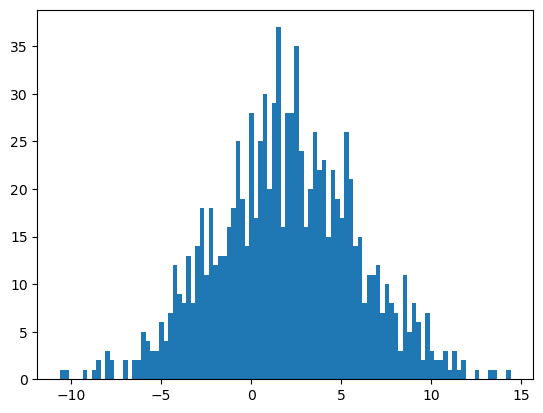

In [168]:
plt.hist(data, bins = 100)
plt.show()

In [169]:
mu_mle = data.mean()

In [170]:
sigma_mle = (((data - data.mean()) ** 2).mean()) ** 0.5

In [171]:
print("Estimated 𝜇 :", mu_mle)
print("Estimated 𝜎 :", sigma_mle )

Estimated 𝜇 : 1.9706399225581466
Estimated 𝜎 : 3.9397474357257147


## Q4 
Suppose you have a dataset of binary classification, and you want to estimate the parameters of a logistic regression model using MAP estimation with a Gaussian prior on the model parameters. How would you formulate the likelihood, prior, and posterior distributions, and how would you find the MAP estimate of the model parameters in Python?

#### Answer :

Let $\theta$ be model parameters and $x$ be sample data then we can say : $$p(\theta | x) = \frac{p(x | \theta) \cdot p(\theta)}{p(x)}$$
where :  
$$
p(\theta | x) : Posterior
$$
$$
p(x | \theta) : Likelihood    
$$
$$
p(\theta) : Prior    
$$

In the case of Logistic Regression the likelihood function will be : $$p(x | \theta) = \prod_{i=1}^{n} \left[ \sigma(\theta^T x_i) \right]^{y_i} \left[ 1 - \sigma(\theta^T x_i) \right]^{1 - y_i}
$$
(Since the data follows Bernoulli Distribution)  
(Here $\sigma$ represnets Sigmoid function and $n$ will be batch size)

Given that $\theta \sim \mathcal{N}(x; \mu, \sigma^2) $  
We can say : 
$$p(\theta) =  \prod_{i=1}^{m} \frac{1}{{\sigma \sqrt{2\pi}}} e^{-\frac{(\theta_i - \mu)^2}{2\sigma^2}}$$

As $p(x)$ does not depend upon $\theta$ we can say 

$$
p(\theta|x) \propto p(x|\theta)p(\theta)
$$ 



also we don't want to find the exact the value of $p(\theta|x)$ we just want to find the value of $\theta$ where its value will be maximum.  
To make things easier we can also say since log function is monotonic:


$$
\log{p(\theta|x)} \propto \log{p(x |\theta)} + \log{p(\theta)}
$$


$$
\log{p(\theta | x)} \propto \sum_{i=1}^{n} [y_i \log{\sigma(\theta^T x_i)} + (1 - y_i)\log{\sigma(\theta^T x_i)}] + \sum_{i=1}^{m}-\frac{(\theta_i - \mu)^2}{2\sigma^2} + const.
$$

Now our goal in MAP is to maximize $p(\theta | x)$ be varying $\theta$
or we can say to minimize $-\log{p(\theta | x)}$

The expression becomes
$$
\mathcal{L}(\theta, x, y) = -\sum_{i=1}^{n} [y_i \log{\sigma(\theta^T x_i)} + (1 - y_i)\log{\sigma(\theta^T x_i)}] + \sum_{i=1}^{m}[\frac{\theta_i^2}{2\sigma^2} - \frac{\theta_i\mu}{\sigma^2}] + const.
$$  
since we need to minimize it we can consider it as our new loss function for optimizing the parameters of the model 
Then we can use batch gradient descent to optimize $\theta$ by first calculating loss for a batch then calculating gradient of loss wrt. $\theta$ i.e. $\frac{\partial\mathcal{L}}{\partial \theta}$ and optimizing them by the following equation :
$$
\theta_{t+1} = \theta_{t} - {\eta \frac{\partial\mathcal{L}}{\partial \theta}}
$$  
where $\eta$ is a hyperparameter and at time step $t$ for multiple such time steps

### Q6

In [77]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
from tqdm import tqdm

### Strategy Used to estimate parameters  
We will be using Bayes Theorem to calculate $P(D_1|x)$ and $P(D_2|x)$ which means probability that data belongs to $D_1$ given x and similar for $D_2$. Then we can use it to calculate mean for $D_1$ that is $E(x | D1)$ or mean of x assuming they belong to $D_1$ similar for $D_2$ and update the values of $u_1$ and $u_2$ with new means. Similarly we can calculate variance of $x$ assuming that they belong to $D_1$ and take its sqrt() to get sigma1 and similary get $sigma_2$ from $D_2$. For $r$ that is the fraction of samples from $D_1$ we need to calculate $E(D_1|x)$ that is the expected value of posterior of $D_1$ conditioned on $x$. 

In [156]:
u1, u2, sigma1, sigma2, r = -1, 1, 0.5, 1, 0.5 #Assume Initial Random Values

In [161]:
#Bayes Theorem
def P_D1_x(x, u1, u2, sigma1, sigma2, r): #P(D1|x) = P(x|D1) * P(D1) / (P(x|D1) * P(D1)  +  P(x|D2) * P(D2))
    pdf1 = stats.norm(u1, sigma1)
    pdf2 = stats.norm(u2, sigma2)
    return  r * pdf1.pdf(x) / (r * pdf1.pdf(x) + (1 - r) * pdf2.pdf(x))

def P_D2_x(x, u1, u2, sigma1, sigma2, r): #P(D2|x) = P(x|D2) * P(D2) / (P(x|D1) * P(D1)  +  P(x|D2) * P(D2))
    pdf1 = stats.norm(u1, sigma1)
    pdf2 = stats.norm(u2, sigma2)
    return  (1 - r) * pdf2.pdf(x) / (r * pdf1.pdf(x) + (1 - r) * pdf2.pdf(x))

In [158]:
data = pd.read_csv('dataset.csv')

In [159]:
x = np.array(data)

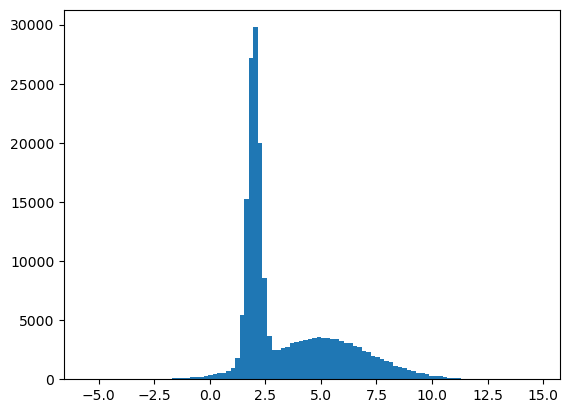

In [160]:
#Given data distribution
plt.hist(x, bins = 100)
plt.show()

In [162]:
for i in tqdm(range(30)):
    p_d1_x = P_D1_x(x, u1, u2, sigma1, sigma2, r).reshape(-1) # P(D1 | x = x1, x2, x3, x4 ...)
    p_d2_x = P_D2_x(x, u1, u2, sigma1, sigma2, r).reshape(-1) # P(D2 | x = x1, x2, x3, x4 ...)
    
    u1 = p_d1_x.dot(x) / sum(p_d1_x) # mu1 = E(x | D1) 
    u2 = p_d2_x.dot(x) / sum(p_d2_x) # mu2 = E(x | D2)
    
    sigma1 = (p_d1_x.dot((x - u1)**2)/(sum(p_d1_x))) ** 0.5 # sigma1 = sqrt(Var(x | D1))
    sigma2 = (p_d2_x.dot((x - u2)**2)/(sum(p_d2_x))) ** 0.5 # sigma2 = sqrt(Var(x | D2))
    
    r = (p_d1_x).mean() # E(D1 | x) 

100%|███████████████████████████████████████████████████████| 30/30 [00:05<00:00,  5.21it/s]


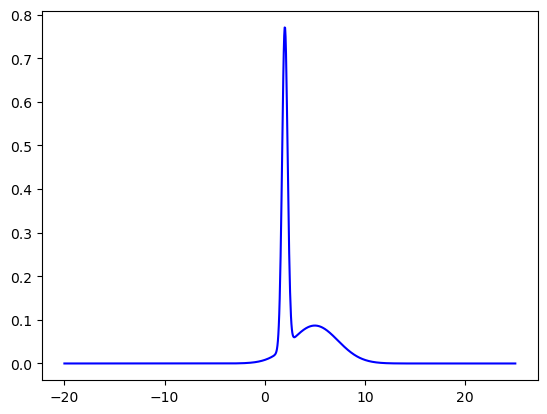

In [163]:
#Predicted PDF
xs = np.linspace(-20, 25, 1000)
def pdf(u1, sigma1, u2, sigma2, r, x):
    pdf1 = stats.norm(u1, sigma1)
    pdf2 = stats.norm(u2, sigma2)
    return pdf1.pdf(x) * r + pdf2.pdf(x) * ( 1 - r)

plt.plot(xs, pdf(u1, sigma1, u2, sigma2, r, xs), color = 'blue')
plt.show()

#### iv.   
If both D1 and D2 distributions are given then we can employ similar strategy used in the above problem wherein instead of estimating u1, sigma1, u2, sigma2 we will just estimate the value of r that is the probability a data point belongs to D1, thus r = n(D1) / (n(D1) + n(D2)) so ratio of n(D1) : n(D2) will be just r / (1 - r)